In [1]:
#| label: libraries
#| include: false
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

## Elevator pitch

_paste your elevator pitch here_


In [2]:
#| label: project data
#| code-summary: Read and format project data
# Include and execute your code here
dwellings_ml = pd.read_csv(
    "https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv"
)

__Highlight the grand questions__

## GRAND QUESTION 1

Create 2-3 charts that evaluate potential relationships between the home variables and before1980. Explain what you learn from the charts that could help a machine learning algorithm.

I created 5 charts in order to get a rough view on which features would be good to focus on in this project. I was able to find a few, such as living space and stories that I felt would be important, but still took additional steps shown in later questions to narrow down the best features to base my study on. For the sake of this (and the fact that the last two were not super useful) I will just show the first 3 charts.

In [3]:
#| label: GQ1
#| code-summary: Read and format data
# Include and execute your code here
h_subset = dwellings_ml.filter(
    [
        "livearea",
        "finbsmnt",
        "basement",
        "yearbuilt",
        "nocars",
        "numbdrm",
        "numbaths",
        "before1980",
        "stories",
        "yrbuilt",
    ]
).sample(500)
h_subset_2 = dwellings_ml.filter(
    [
        "totunits",
        "sprice",
        "deduct",
        "netprice",
        "tasp",
        "before1980",
        "smonth",
        "yrbuilt",
        "syear",
    ]
).sample(500)
h_subset_3 = dwellings_ml.filter(
    [
        "condition_AVG",
        "condition_Excel",
        "condition_Fair",
        "condition_Good",
        "condition_VGood",
        "before1980",
        "quality_A",
        "yrbuilt",
        "quality_B",
        "quality_C",
        "quality_D",
        "quality_X",
    ]
).sample(500)
h_subset_4 = dwellings_ml.filter(
    [
        "gartype_Att",
        "gartype_Att/Det",
        "gartype_CP",
        "gartype_Det",
        "gartype_None",
        "gartype_att/CP",
        "gartype_det/CP",
        "arcstyle_BI-LEVEL",
        "arcstyle_CONVERSIONS",
        "arcstyle_END UNIT",
        "arcstyle_MIDDLE UNIT",
        "yrbuilt",
        "before1980",
    ]
).sample(500)
h_subset_5 = dwellings_ml.filter(
    [
        "arcstyle_ONE AND HALF-STORY",
        "arcstyle_ONE-STORY",
        "arcstyle_SPLIT LEVEL",
        "arcstyle_THREE-STORY",
        "arcstyle_TRI-LEVEL",
        "arcstyle_TRI-LEVEL WITH BASEMENT",
        "arcstyle_TWO AND HALF-STORY",
        "arcstyle_TWO-STORY",
        "qualified_Q",
        "qualified_U",
        "status_I",
        "status_V",
        "yrbuilt",
        "before1980",
    ]
).sample(500)

<Axes: >

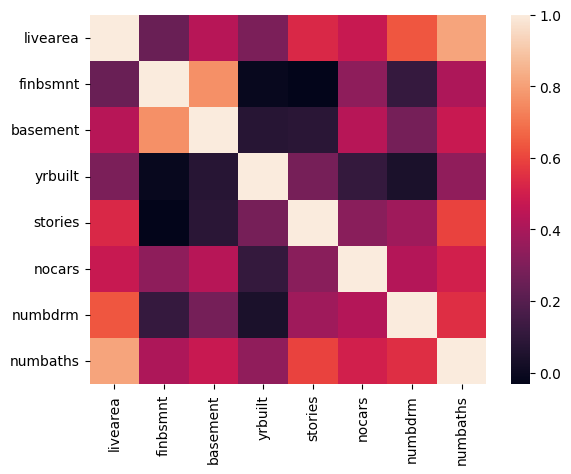

In [4]:
#| label: GQ1 chart
#| code-summary: plot example
#| fig-cap: Heatmap Charts
#| fig-align: center
# Include and execute your code here
corr1 = h_subset.drop(columns="before1980").corr()
sns.heatmap(corr1)

<Axes: >

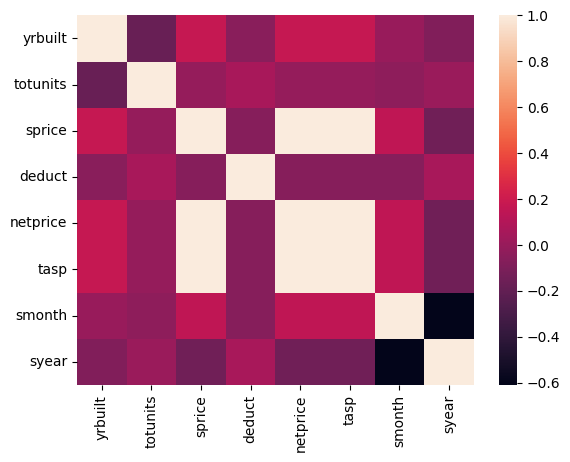

In [5]:
#| label: GQ1 chart 2
#| code-summary: plot example
#| fig-cap: Heatmap Charts
#| fig-align: center
# Include and execute your code here

corr2 = h_subset_2.drop(columns="before1980").corr()
sns.heatmap(corr2)

<Axes: >

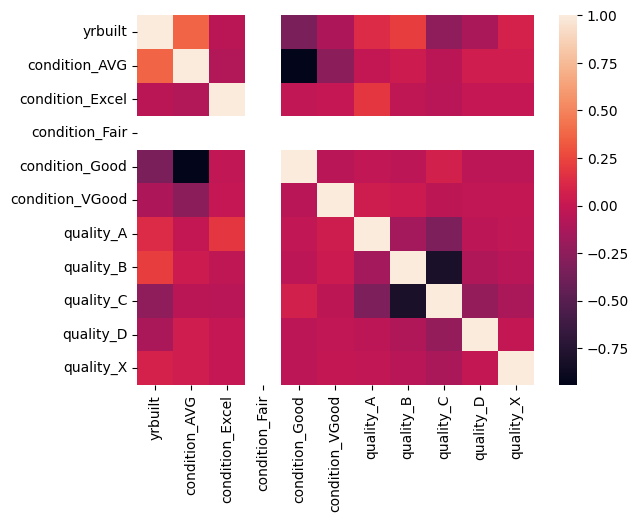

In [6]:
#| label: GQ1 chart 3
#| code-summary: plot example
#| fig-cap: Heatmap Charts
#| fig-align: center
# Include and execute your code here

corr3 = h_subset_3.drop(columns="before1980").corr()
sns.heatmap(corr3)

## GRAND QUESTION 2

Build a classification model labeling houses as being built “before 1980” or “during or after 1980”. Your goal is to reach or exceed 90% accuracy. Explain your final model choice (algorithm, tuning parameters, etc) and describe what other models you tried.

I originally built a classification model using the decision tree model using all of the features available. This was just under 90% accurate, so I ended up creating a random forest model as well which was a few points over 90%. In question 3 I will show how I was able to get both of those to increase, and the decision tree to reach over 90%.


In [7]:
#| label: GQ2
#| code-summary: Read and format data
# Include and execute your code here
X_pred = dwellings_ml.drop(
    dwellings_ml.filter(regex="before1980|yrbuilt").columns, axis=1
)
y_pred = dwellings_ml.filter(regex="before1980")
X_train, X_test, y_train, y_test = train_test_split(
    X_pred, y_pred, test_size=0.34, random_state=76
)
features = [
    "livearea",
    "finbsmnt",
    "basement",
    "nocars",
    "numbdrm",
    "numbaths",
    "before1980",
    "stories",
    "yrbuilt",
    "totunits",
    "sprice",
    "deduct",
    "netprice",
    "tasp",
    "smonth",
    "yrbuilt",
    "syear",
    "condition_AVG",
    "condition_Excel",
    "condition_Fair",
    "condition_Good",
    "condition_VGood",
    "quality_A",
    "yrbuilt",
    "quality_B",
    "quality_C",
    "quality_D",
    "quality_X",
    "gartype_Att",
    "gartype_Att/Det",
    "gartype_CP",
    "gartype_Det",
    "gartype_None",
    "gartype_att/CP",
    "gartype_det/CP",
    "arcstyle_BI-LEVEL",
    "arcstyle_CONVERSIONS",
    "arcstyle_END UNIT",
    "arcstyle_MIDDLE UNIT",
    "yrbuilt",
    "arcstyle_ONE AND HALF-STORY",
    "arcstyle_ONE-STORY",
    "arcstyle_SPLIT LEVEL",
    "arcstyle_THREE-STORY",
    "arcstyle_TRI-LEVEL",
    "arcstyle_TRI-LEVEL WITH BASEMENT",
    "arcstyle_TWO AND HALF-STORY",
    "arcstyle_TWO-STORY",
    "qualified_Q",
    "qualified_U",
    "status_I",
    "status_V",
    "yrbuilt",
]

In [8]:
#| label: GQ2 chart
#| code-summary: plot example
#| fig-cap: Decision Tree
#| fig-align: center
# Include and execute your code here
subset_dt = dwellings_ml[features]
subset_dt = subset_dt.dropna()
le_dt = LabelEncoder()
subset_dt["before1980"] = le_dt.fit_transform(subset_dt["before1980"])
X_dt = subset_dt.drop(["before1980", "yrbuilt"], axis=1)
y_dt = subset_dt["before1980"]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42
)
clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt.fit(X_train_dt, y_train_dt)

y_pred_dt = clf_dt.predict(X_test_dt)

accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("Decision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

Decision Tree Accuracy: 89.70%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1710
           1       0.93      0.91      0.92      2873

    accuracy                           0.90      4583
   macro avg       0.89      0.89      0.89      4583
weighted avg       0.90      0.90      0.90      4583



In [9]:
#| label: GQ2 chart 2
#| code-summary: plot example
#| fig-cap: Random Forest
#| fig-align: center
# Include and execute your code here
subset_rf = dwellings_ml[features]
subset_rf = subset_rf.dropna()

le_rf = LabelEncoder()
subset_rf["before1980"] = le_rf.fit_transform(subset_rf["before1980"])

X_rf = subset_rf.drop(["before1980", "yrbuilt"], axis=1)
y_rf = subset_rf["before1980"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf_rf.fit(X_train_rf, y_train_rf)

y_pred_rf = clf_rf.predict(X_test_rf)

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

print("Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

Random Forest Accuracy: 92.76%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1710
           1       0.94      0.95      0.94      2873

    accuracy                           0.93      4583
   macro avg       0.92      0.92      0.92      4583
weighted avg       0.93      0.93      0.93      4583



## GRAND QUESTION 3

Justify your classification model by discussing the most important features selected by your model. This discussion should include a chart and a description of the features.

I started this project looking at the charts in order to determine the best possible criteria for creating my classification model, but even still, I wanted to test all of them. In order to do this, I used all of the criteria in
my first model (besides "before1980" and "yrbuilt") and then I played around with the importance for both my decision tree and my random forest. For decision tree, I was able to get over 90% with all features over .015 importance,
and with my random forest I was able to get over 90% with all of the features, but still filtered it just to ones over .012 importance. The most important features for both classification models were "arcstyle_one-story" (whether the house is just one story or not) and "livearea" (Total living area of the house).


In [10]:
#| label: GQ3 chart 1
#| code-summary: table example
#| tbl-cap: Decision Tree Chart
#| tbl-cap-location: top
# Include and execute your code here
feature_importances_dt = clf_dt.feature_importances_

feature_importance_df_dt = pd.DataFrame(
    {"Feature": X_dt.columns, "Importance": feature_importances_dt}
)

feature_importance_df_dt = feature_importance_df_dt.sort_values(
    by="Importance", ascending=False
)

chart_dt = (
    alt.Chart(feature_importance_df_dt)
    .mark_bar()
    .encode(
        y=alt.Y("Feature:N", title="Feature"),
        x=alt.X("Importance:Q", title="Importance"),
        color=alt.Color("Importance:Q", scale=alt.Scale(scheme="viridis")),
        tooltip=["Feature", "Importance"],
    )
    .properties(title="Feature Importance in Decision Tree Classifier")
)

chart_dt

C:\Users\joshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\altair\utils\core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [11]:
#| label: GQ3 chart 2
#| code-summary: table example
#| tbl-cap: Random Forest Chart
#| tbl-cap-location: top
# Include and execute your code here
feature_importances_rf = clf_rf.feature_importances_

feature_importance_df_rf = pd.DataFrame(
    {"Feature": X_rf.columns, "Importance": feature_importances_rf}
)

feature_importance_df_rf = feature_importance_df_rf.sort_values(
    by="Importance", ascending=False
)

chart_rf = (
    alt.Chart(feature_importance_df_rf)
    .mark_bar()
    .encode(
        y=alt.Y("Feature:N", title="Feature"),
        x=alt.X("Importance:Q", title="Importance"),
        color=alt.Color("Importance:Q", scale=alt.Scale(scheme="viridis")),
        tooltip=["Feature", "Importance"],
    )
    .properties(title="Feature Importance in Random Forest Classifier")
)

chart_rf

C:\Users\joshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\altair\utils\core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [12]:
#| label: GQ3 list
#| code-summary: table example
#| tbl-cap: List of Important Features
#| tbl-cap-location: top
# Include and execute your code here
important_features_dt = X_dt.columns[feature_importances_dt >= 0.015]
if "before1980" not in important_features_dt:
    important_features_dt = np.append(important_features_dt, "before1980")
if "yrbuilt" not in important_features_dt:
    important_features_dt = np.append(important_features_dt, "yrbuilt")
important_features_rf = X_rf.columns[feature_importances_rf >= 0.012]
if "before1980" not in important_features_rf:
    important_features_rf = np.append(important_features_rf, "before1980")
if "yrbuilt" not in important_features_rf:
    important_features_rf = np.append(important_features_rf, "yrbuilt")

print("Important Features for Decision Tree:")
print(important_features_dt)

print("Important Features for Random Forest:")
print(important_features_rf)

Important Features for Decision Tree:
['livearea' 'finbsmnt' 'basement' 'nocars' 'numbdrm' 'numbaths' 'stories'
 'sprice' 'netprice' 'tasp' 'smonth' 'condition_AVG' 'quality_C'
 'gartype_Att' 'arcstyle_ONE-STORY' 'status_I' 'before1980' 'yrbuilt']
Important Features for Random Forest:
['livearea' 'finbsmnt' 'basement' 'nocars' 'numbdrm' 'numbaths' 'stories'
 'sprice' 'deduct' 'netprice' 'tasp' 'smonth' 'condition_AVG'
 'condition_Good' 'quality_B' 'quality_C' 'gartype_Att' 'gartype_Det'
 'arcstyle_END UNIT' 'arcstyle_MIDDLE UNIT' 'arcstyle_ONE-STORY'
 'arcstyle_TWO-STORY' 'status_I' 'status_V' 'before1980' 'yrbuilt']


In [13]:
#| label: GQ3 report 1
#| code-summary: table example
#| tbl-cap: Improved Decision Tree
#| tbl-cap-location: top
# Include and execute your code here
improved_dt = dwellings_ml[important_features_dt]
improved_dt = improved_dt.dropna()
le_dt = LabelEncoder()
improved_dt["before1980"] = le_dt.fit_transform(improved_dt["before1980"])
X_dt = improved_dt.drop(["before1980", "yrbuilt"], axis=1)
y_dt = improved_dt["before1980"]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42
)

clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt.fit(X_train_dt, y_train_dt)

y_pred_dt = clf_dt.predict(X_test_dt)

accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Improved Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("Decision Tree Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

Improved Decision Tree Accuracy: 90.18%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1710
           1       0.93      0.91      0.92      2873

    accuracy                           0.90      4583
   macro avg       0.89      0.90      0.90      4583
weighted avg       0.90      0.90      0.90      4583



In [14]:
#| label: GQ3 report 2
#| code-summary: table example
#| tbl-cap: Improved Random Forest
#| tbl-cap-location: top
# Include and execute your code here
improved_rf = dwellings_ml[important_features_rf]
improved_rf = improved_rf.dropna()

le_rf = LabelEncoder()
improved_rf["before1980"] = le_rf.fit_transform(improved_rf["before1980"])

X_rf = improved_rf.drop(["before1980", "yrbuilt"], axis=1)
y_rf = improved_rf["before1980"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf_rf.fit(X_train_rf, y_train_rf)

y_pred_rf = clf_rf.predict(X_test_rf)

accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Improved Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

print("Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

Improved Random Forest Accuracy: 93.02%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1710
           1       0.94      0.95      0.94      2873

    accuracy                           0.93      4583
   macro avg       0.93      0.92      0.93      4583
weighted avg       0.93      0.93      0.93      4583



## GRAND QUESTION 4

Describe the quality of your classification model using 2-3 different evaluation metrics. You also need to explain how to interpret each of the evaluation metrics you use.

The metrics that I used to determine the quality of my classification models were: Accuracy, Precision, Recall, and F1-Score. 
Accuracy is the most straightforward metric, representing the ratio of correctly predicted instances to the total instances. It provides an overall measure of how often the model makes correct predictions. High accuracy is desirable, but it might not be sufficient if the classes are imbalanced.
Precision is the ratio of correctly predicted positive observations to the total predicted positives (true positives / (true positives + false positives)). It represents the ability of the model not to label negative instances as positive. A high precision indicates a low false positive rate.
Recall is the ratio of correctly predicted positive observations to all actual positives (true positives / (true positives + false negatives)). It represents the ability of the model to capture all the relevant instances. A high recall indicates a low false negative rate.
F1-Score is the harmonic mean of precision and recall, providing a balance between the two metrics (2 * (precision * recall) / (precision + recall)). It is particularly useful when there is an uneven class distribution or when both false positives and false negatives are critical.


## APPENDIX A (Additional Python Code)

```python
#paste other your code from your python file (.py) here
```